___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [7]:
KNN = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [8]:
KNN.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [12]:
KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

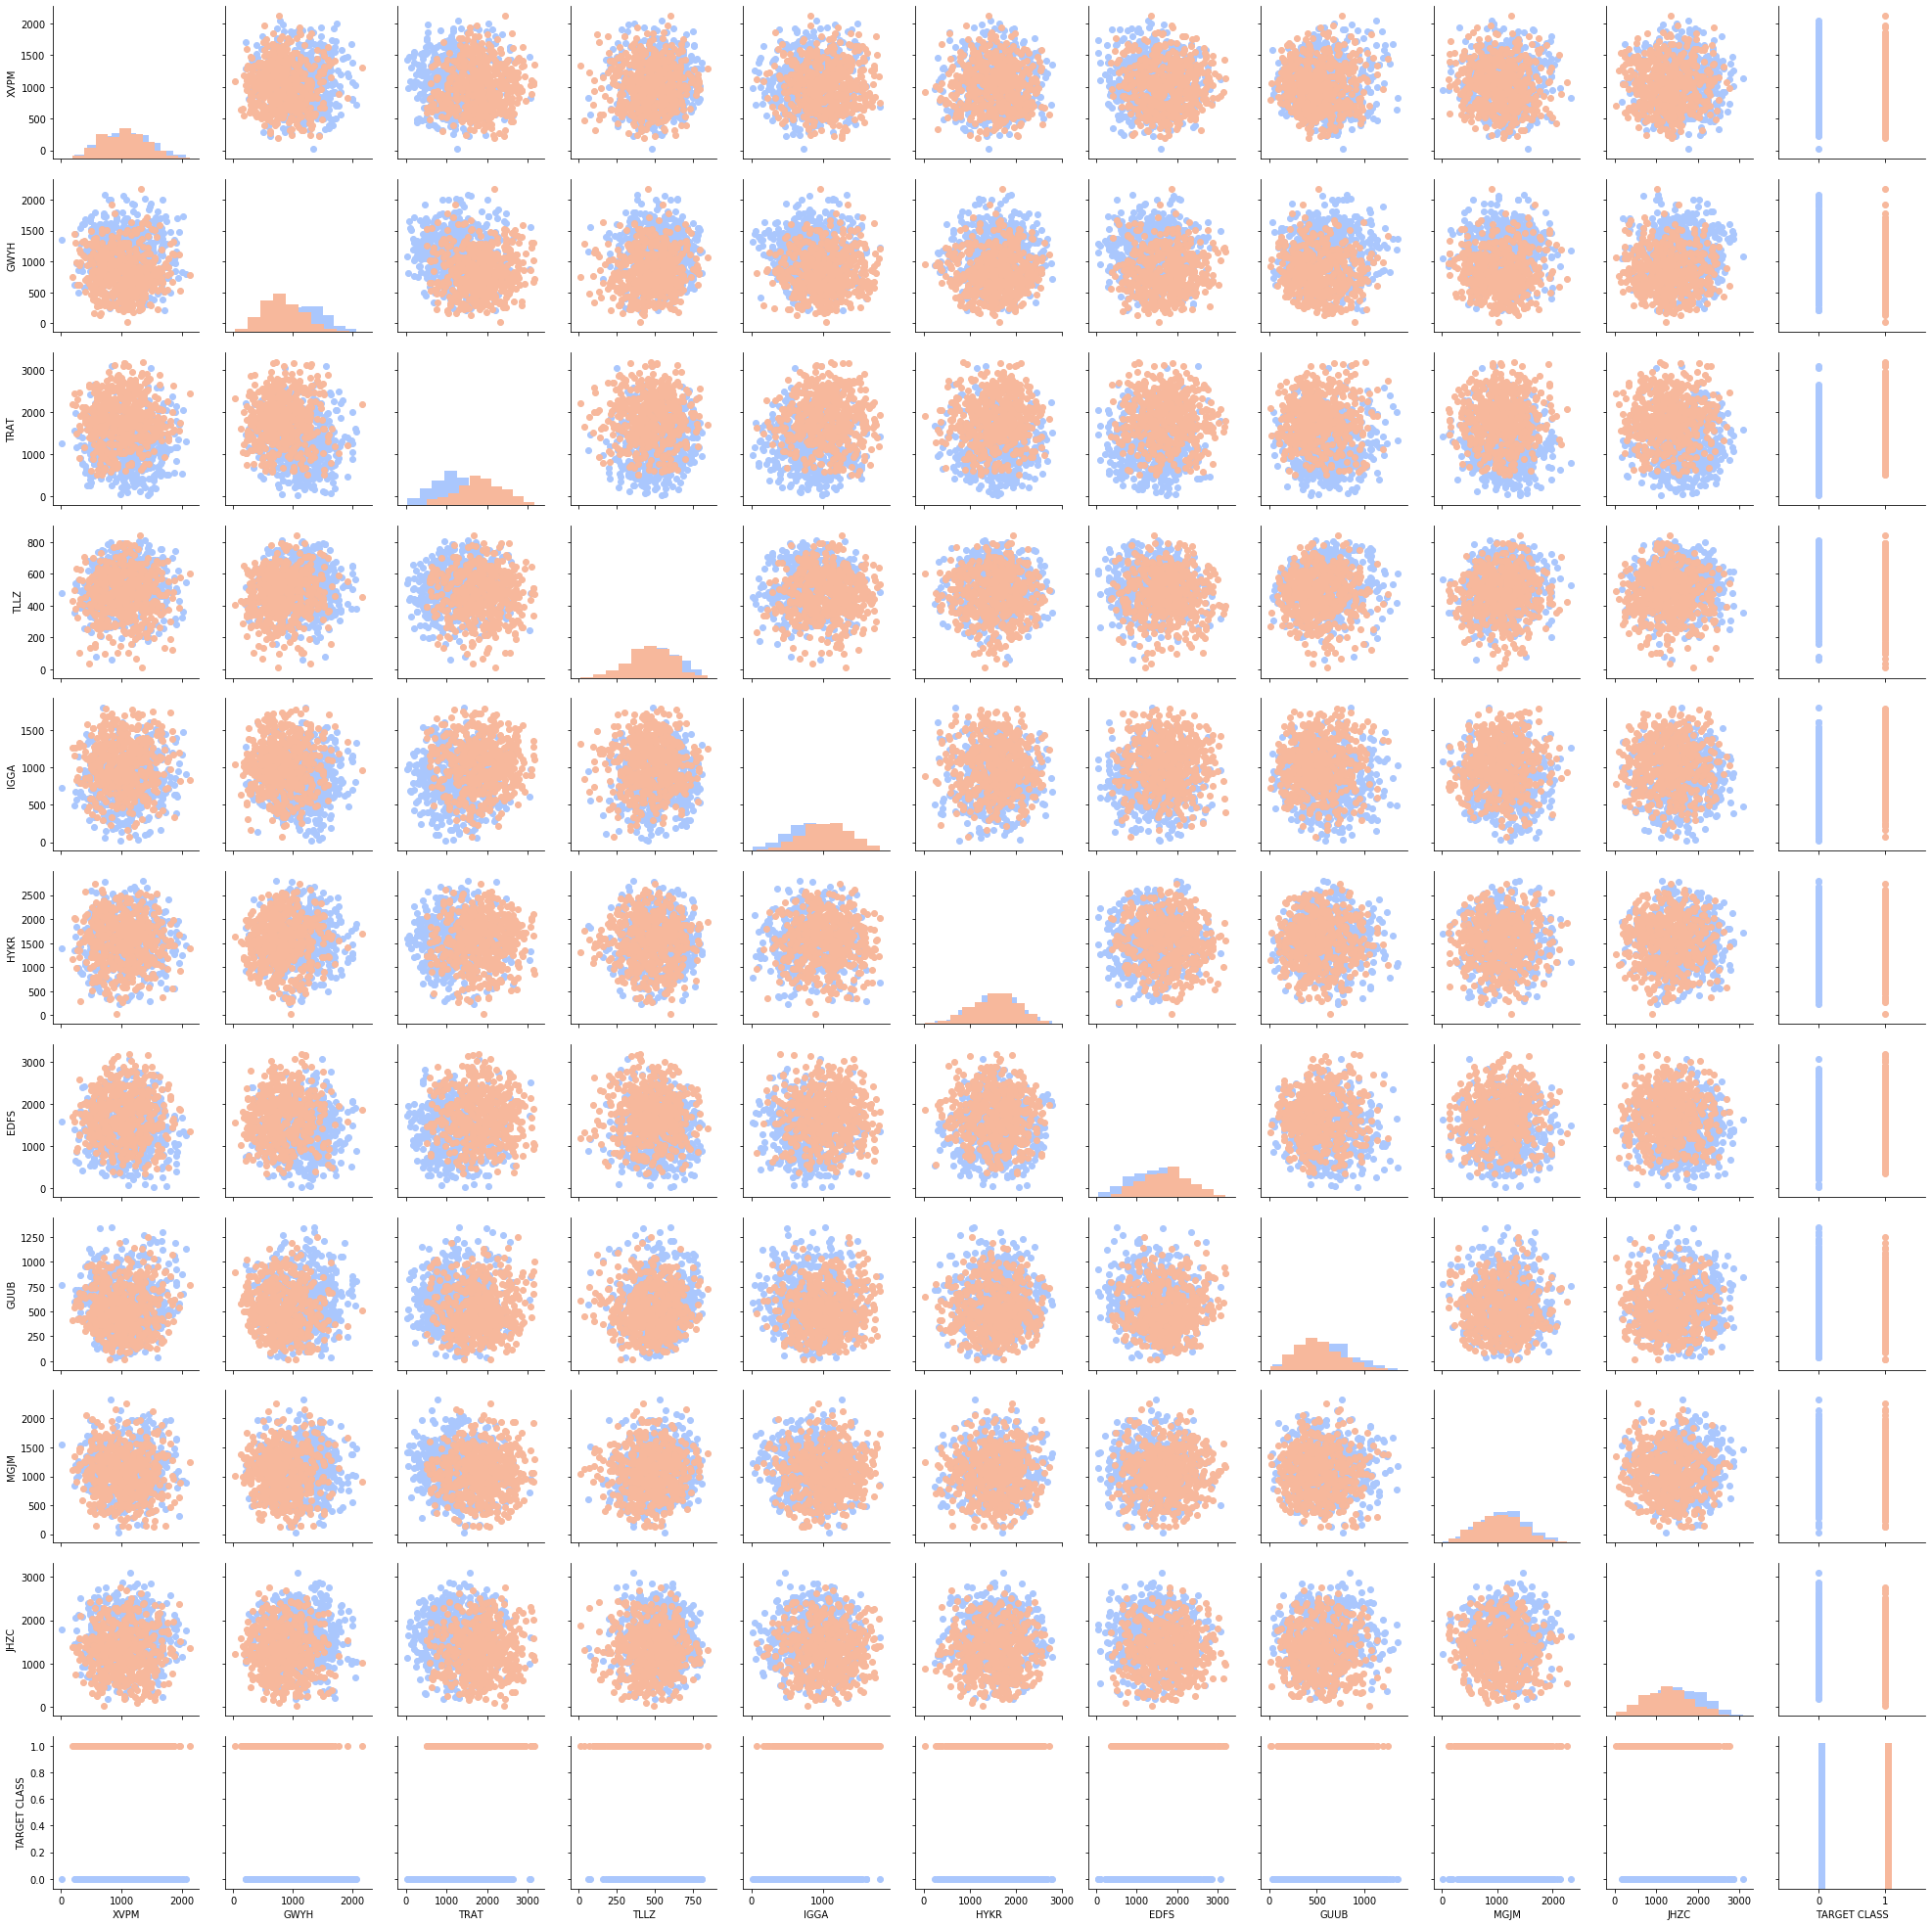

In [35]:
g = sns.PairGrid(KNN,hue="TARGET CLASS",palette='coolwarm')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [36]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [37]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [38]:
scaler.fit(KNN)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
KNN.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**Use the .transform() method to transform the features to a scaled version.**

In [44]:
scaler.fit(KNN).transform(KNN)

array([[ 1.56852168, -0.44343461,  1.61980773, ...,  1.00831307,
        -1.06962723, -1.        ],
       [-0.11237594, -1.05657361,  1.7419175 , ...,  0.25832069,
        -1.04154625,  1.        ],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  2.1847836 ,
         0.34281129,  1.        ],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -0.27512225,
         0.86428656,  1.        ],
       [ 0.27507999, -0.99239881,  0.0303711 , ...,  0.43668516,
        -0.21245586,  1.        ],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -0.60352946,
        -0.87985868,  1.        ]])

In [47]:
a = scaler.fit(KNN).transform(KNN)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [46]:
type(scaler.fit(KNN).transform(KNN))

numpy.ndarray

In [54]:
KNN_scaler = pd.DataFrame(data=a,columns=KNN.columns)
KNN_scaler

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627,-1.0
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546,1.0
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811,1.0
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793,-1.0
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886,-1.0
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081,1.0
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287,1.0
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456,1.0


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [57]:
from sklearn.model_selection import train_test_split

In [154]:
X = KNN_scaler.iloc[:,:-1]
y = KNN_scaler["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
type(X)

pandas.core.frame.DataFrame

In [101]:
X

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [85]:
y.shape

(1000, 1)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [107]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [111]:
KNN_model=KNeighborsClassifier(n_neighbors=1)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Fit this KNN model to the training data.**

In [112]:
KNN_model.fit(X_train,y_train)

/Users/haohanzhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [139]:
prediction = KNN_model.predict(X_test)

** Create a confusion matrix and classification report.**

In [142]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
print(classification_report(prediction,y_test))

In [137]:
confusion_matrix(prediction,y_test)

array([[119,  50],
       [ 44, 117]])

In [138]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

        -1.0       0.73      0.70      0.72       169
         1.0       0.70      0.73      0.71       161

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [161]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [162]:
error_rate

[0.28484848484848485,
 0.2696969696969697,
 0.23030303030303031,
 0.23939393939393938,
 0.22121212121212122,
 0.20909090909090908,
 0.19696969696969696,
 0.19090909090909092,
 0.18181818181818182,
 0.19696969696969696,
 0.19393939393939394,
 0.19090909090909092,
 0.1787878787878788,
 0.17272727272727273,
 0.16666666666666666,
 0.17272727272727273,
 0.18181818181818182,
 0.17272727272727273,
 0.1696969696969697,
 0.17272727272727273,
 0.17575757575757575,
 0.1787878787878788,
 0.17575757575757575,
 0.17272727272727273,
 0.17575757575757575,
 0.17575757575757575,
 0.16666666666666666,
 0.1696969696969697,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.1696969696969697,
 0.16363636363636364,
 0.1696969696969697,
 0.17575757575757575,
 0.18181818181818182,
 0.1787878787878788,
 0.1787878787878788,
 0.16666666666666666]

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

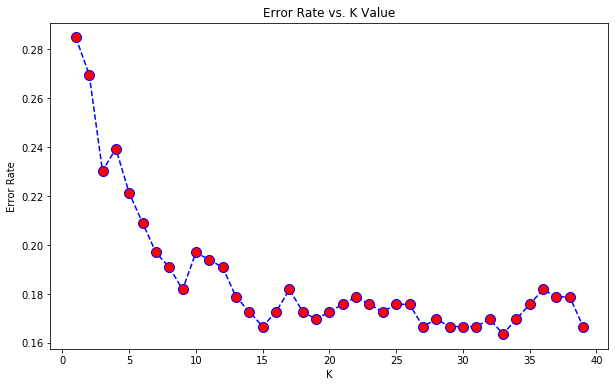

In [163]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [167]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

print(confusion_matrix(pred_i,y_test))
print(classification_report(pred_i,y_test))

[[139  34]
 [ 24 133]]
              precision    recall  f1-score   support

        -1.0       0.85      0.80      0.83       173
         1.0       0.80      0.85      0.82       157

    accuracy                           0.82       330
   macro avg       0.82      0.83      0.82       330
weighted avg       0.83      0.82      0.82       330



# Great Job!